In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
df=pd.read_csv("Mall_Customers (1).csv")

In [181]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [183]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [184]:
df.describe().astype(int)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200,200,200,200
mean,100,38,60,50
std,57,13,26,25
min,1,18,15,1
25%,50,28,41,34
50%,100,36,61,50
75%,150,49,78,73
max,200,70,137,99


In [185]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [186]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [187]:
df.drop("CustomerID",axis=1,inplace=True)

In [188]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [189]:
df["Gender"]= ["M" if i=="Male" else "F" for i in df["Gender"]]

/home/karthik/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/karthik/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/karthik/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


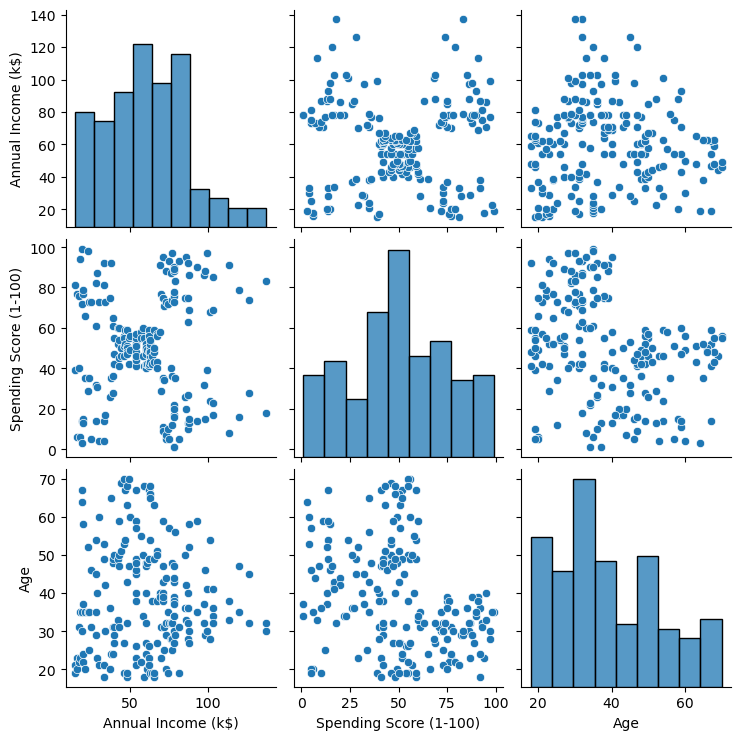

In [190]:
col = ["Annual Income (k$)","Spending Score (1-100)","Age","Gender"]
sns.pairplot(df[col],diag_kind="hist")
plt.show()

In [191]:
from sklearn.cluster import KMeans
fea= df[['Age','Annual Income (k$)','Spending Score (1-100)']]
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(fea)
    wcss.append(kmeans.inertia_)

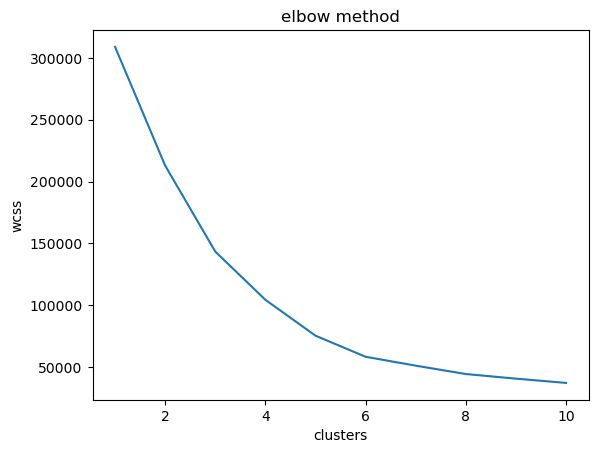

In [192]:
plt.plot(range(1,11),wcss)
plt.title("elbow method")
plt.xlabel("clusters")
plt.ylabel("wcss")
plt.show()

In [193]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)

In [194]:
labels=kmeans.fit_predict(fea)
df['clusters']=labels

In [195]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,M,19,15,39,0
1,M,21,15,81,3
2,F,20,16,6,0
3,F,23,16,77,3
4,F,31,17,40,0


In [196]:
clustermeans=df.groupby('clusters')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean().astype(int)

In [197]:
clustermeans

,Age,Annual Income (k$),Spending Score (1-100)
clusters,,,
0,45,26,20
1,32,86,82
2,43,55,49
3,25,26,78
4,40,87,17


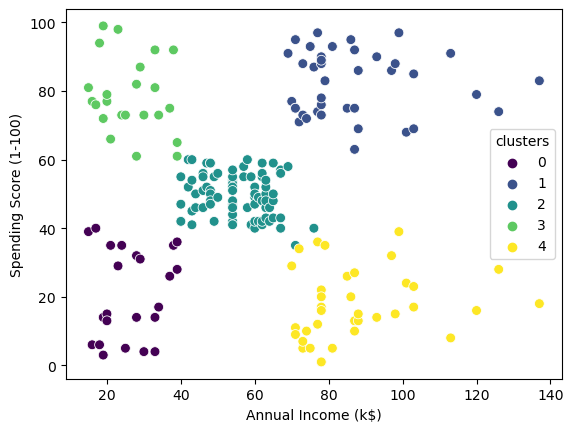

In [198]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='clusters',palette='viridis',s=50)
plt.show()

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

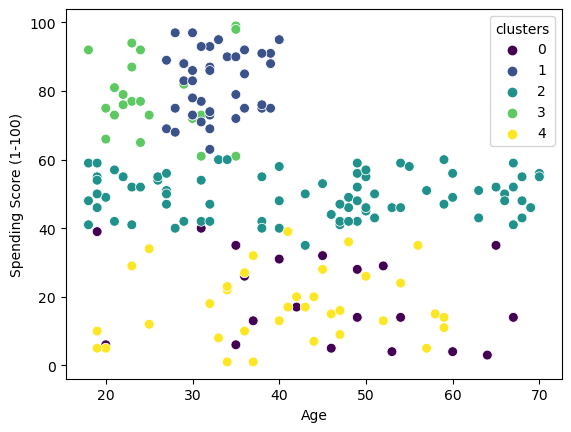

In [199]:
sns.scatterplot(data=df,x='Age',y='Spending Score (1-100)',hue='clusters',palette='viridis',s=50)

<Axes: xlabel='clusters', ylabel='count'>

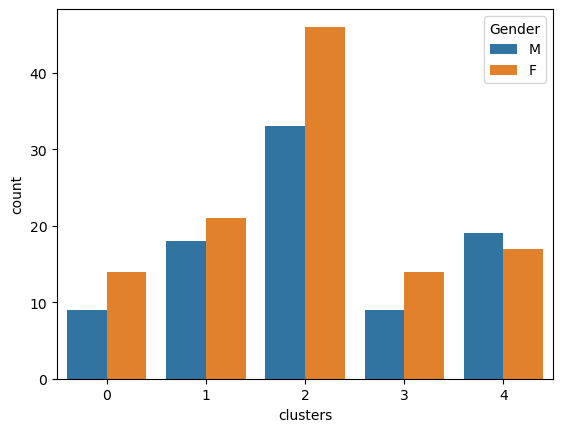

In [200]:
sns.countplot(data=df,x='clusters',hue='Gender')

/home/karthik/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/karthik/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/karthik/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


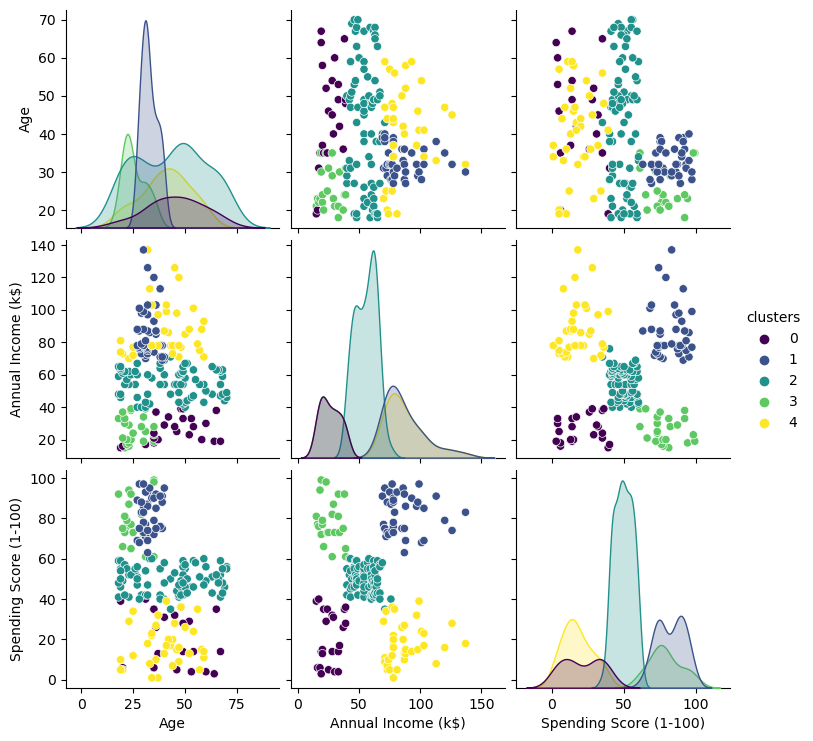

In [201]:
sns.pairplot(df,hue='clusters',palette='viridis')

Text(0.5, 1.0, 'Spending Score (1-100)')

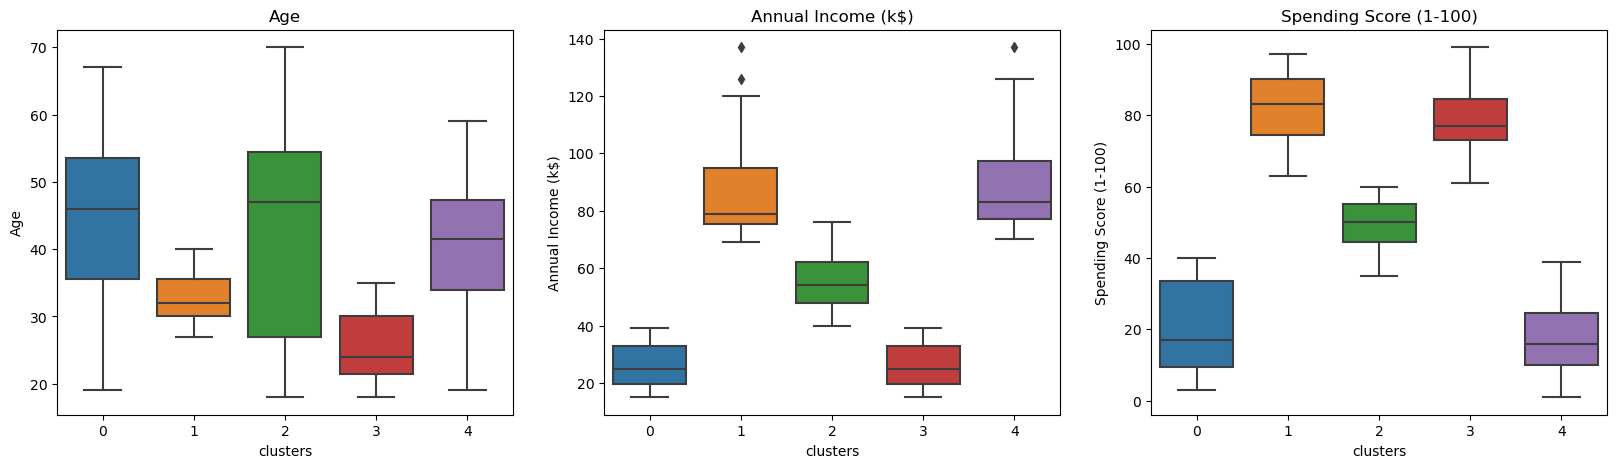

In [202]:
fig,axs=plt.subplots(1,3,figsize=(20,5))
sns.boxplot(data=df,x='clusters',y='Age',ax=axs[0])
axs[0].set_title('Age')
sns.boxplot(data=df,x='clusters',y='Annual Income (k$)',ax=axs[1])
axs[1].set_title('Annual Income (k$)')
sns.boxplot(data=df,x='clusters',y='Spending Score (1-100)',ax=axs[2])
axs[2].set_title('Spending Score (1-100)')

In [203]:
from sklearn.metrics import silhouette_score
ss=silhouette_score(df[['Annual Income (k$)','Spending Score (1-100)','Age']],df['clusters'])
ss

0.44428597560893024

In [204]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
scaler = StandardScaler()
scal_feat = scaler.fit_transform(df[['Annual Income (k$)','Spending Score (1-100)','Age']])
kmeans = KMeans(n_clusters=5,random_state=42)
kmeans.fit(scal_feat)
df['scaled_cluster']=kmeans.labels_

In [205]:
sss=silhouette_score(scal_feat,df['scaled_cluster'])
sss

0.40846873777345605

In [206]:
from sklearn.cluster import AgglomerativeClustering
agg_clus = AgglomerativeClustering(n_clusters=5)
agg_clus.fit(scal_feat)
df['Agg_clus']=agg_clus.labels_
agg_ss=silhouette_score(scal_feat,df['Agg_clus'])
agg_ss

0.39002826186267214

In [207]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca=PCA(n_components=2)
pca_fea=pca.fit_transform(scal_feat)
kmeans=KMeans(n_clusters=5,random_state=42)
kmeans.fit(pca_fea)
df['pca_clus']=kmeans.labels_
pss=silhouette_score(pca_fea,df['pca_clus'])
pss

0.38978616968277185

In [208]:
from sklearn.cluster import DBSCAN
dbsc=DBSCAN(eps=0.5,min_samples=5)
dbsc.fit(pca_fea)
df['db_clus']=dbsc.labels_
dbss=silhouette_score(pca_fea,df['db_clus'])
dbss

0.3203118288175695

In [210]:
cluster_charcteristics=df.groupby('clusters')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean().astype(int)

In [211]:
cluster_charcteristics

,Age,Annual Income (k$),Spending Score (1-100)
clusters,,,
0,45,26,20
1,32,86,82
2,43,55,49
3,25,26,78
4,40,87,17
